For my first Python project, I was curious how the pandemic was affecting transportation, as I am a transportation planner. I have gone out to exercise every day during the stay at home orders, and have observed many others doing the same, particularly at big city parks, like Myrtle Edwards. The City took notice and closed down some parks temporarily that were getting too crowded to allow for social distancing. I wondered if people were more likely to be in parks these days given that there are so few other places to be. I found a dataset from the Seattle Department of Transportation on bicycle and pedestrian counts from 2014-2020 at a specific point at Myrtle Edwards Park: https://data.seattle.gov/Transportation/Elliott-Bay-Trail-in-Myrtle-Edwards-Park-Bicycle-a/4qej-qvrz. Eventually I will use the API to access this data in this notebook, but to get started I downloaded the excel file and reference that here. 

In [1]:
import sys
!{sys.executable} -m pip install pandas

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import sys
!{sys.executable} -m pip install ipywidgets>=7.5

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import sys
!{sys.executable} -m pip install xlrd

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
import sys
!{sys.executable} -m pip install plotly

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
file_name = 'Desktop/Python/Side Project/Data/Elliott_Bay_Trail_in_Myrtle_Edwards_Park_Bicycle_and_Pedestrian_Counter.xlsx'
all_counts = pd.read_excel(file_name)
records = all_counts.to_dict('records')

In [6]:
all_counts.head()

,ID,Date,Month,Year,Day of Week,Time,Total,Ped North,Ped South,Bike North,Bike South
0,1,2014-01-01,1,2014,Wednesday,00:00:00,20.0,5.0,11.0,1.0,3.0
1,2,2014-01-01,1,2014,Wednesday,01:00:00,7.0,2.0,3.0,1.0,1.0
2,3,2014-01-01,1,2014,Wednesday,02:00:00,5.0,1.0,0.0,3.0,1.0
3,4,2014-01-01,1,2014,Wednesday,03:00:00,4.0,2.0,0.0,1.0,1.0
4,5,2014-01-01,1,2014,Wednesday,04:00:00,2.0,1.0,1.0,0.0,0.0


In [7]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [8]:
import plotly.graph_objects as go

In [9]:
import time
import datetime

When I first imported this file, I ran 
records[5]
to see what the data looked like. The 'Date' field with its Timestamp threw me off at first, which I'll get to below. 

In [10]:
records[5]

{'ID': 6,
 'Date': Timestamp('2014-01-01 00:00:00'),
 'Month': 1,
 'Year': 2014,
 'Day of Week': 'Wednesday',
 'Time': datetime.time(5, 0),
 'Total': 4.0,
 'Ped North': 2.0,
 'Ped South': 0.0,
 'Bike North': 1.0,
 'Bike South': 1.0}

In [11]:
len(records)

54768

So records is a list of dictionaries. Each record has the same keys and different values. There are over 54,000 records in this dataset, so I need a quick way to select a subset of records so that every function doesn't iterate through the whole thing.

In [12]:
def filterbydate(weekday, month, year):
    return list(record for record in records if record['Day of Week']==weekday and record['Month']==month and record['Year']==year)

I create the below testlist to give myself a small section of the dataset to try out functions on. 

In [13]:
testlist = filterbydate('Wednesday', 3, 2020)[12:15]
testlist

[{'ID': 54109,
  'Date': Timestamp('2020-03-04 00:00:00'),
  'Month': 3,
  'Year': 2020,
  'Day of Week': 'Wednesday',
  'Time': datetime.time(12, 0),
  'Total': 346.0,
  'Ped North': 151.0,
  'Ped South': 157.0,
  'Bike North': 19.0,
  'Bike South': 19.0},
 {'ID': 54110,
  'Date': Timestamp('2020-03-04 00:00:00'),
  'Month': 3,
  'Year': 2020,
  'Day of Week': 'Wednesday',
  'Time': datetime.time(13, 0),
  'Total': 254.0,
  'Ped North': 100.0,
  'Ped South': 97.0,
  'Bike North': 35.0,
  'Bike South': 22.0},
 {'ID': 54111,
  'Date': Timestamp('2020-03-04 00:00:00'),
  'Month': 3,
  'Year': 2020,
  'Day of Week': 'Wednesday',
  'Time': datetime.time(14, 0),
  'Total': 295.0,
  'Ped North': 127.0,
  'Ped South': 101.0,
  'Bike North': 30.0,
  'Bike South': 37.0}]

As mentioned above, the 'Date' key formats its values as Timestamp('2014-01-01 00:00:00'), which I wasn't sure what to do with at first. This video helped: https://www.youtube.com/watch?v=yCgJGsg0Xa4. Below, I format the timestamp into something more workable and then use it to create a function that, given a date, returns a list of the total counts per hour on that day (for a total of 24). 

In [25]:
def timestamp(mmddyyyy):
    return pd.to_datetime(mmddyyyy)

def hourlycounts(date): #date must be entered as 'mm/dd/yyyy', including quotes
    y_values=[]
    date_filtered = list(record for record in records if record['Date']==timestamp(date))
    list(map(lambda record: y_values.append(record['Total']), date_filtered))
    return y_values
hourlycounts('3/14/20')

[0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 4.0,
 6.0,
 29.0,
 67.0,
 128.0,
 206.0,
 175.0,
 197.0,
 270.0,
 315.0,
 333.0,
 252.0,
 185.0,
 125.0,
 56.0,
 17.0,
 7.0,
 7.0,
 11.0]

If I want to be able to create graphs with time or date as an independent variable, I need to be able to generate a list of all the values associated with a specific key. Below, I create a function and test it out on testlist.

In [14]:
def list_from_dictionary(dictlist, key):
    return [sub[key] for sub in dictlist]
list_from_dictionary(testlist, 'Time')

[datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0)]

Note that this function would not filter out duplicates, and if I run this on the whole dataset I don't want to return 54,000 items.

In [24]:
list_from_dictionary(testlist, 'Day of Week')

['Wednesday', 'Wednesday', 'Wednesday']

To create a list of all the values for a given key, without duplicates, I need a new function. 

In [16]:
#generate list of all unique values in a given column in the dataset. Use to generate x values for graphs and in for loops.
def unique(recordlist, key):
    new_list=[]
    list1 = list_from_dictionary(recordlist, key)
    list_set = set(list1)
    unique_list = list(list_set)
    for x in unique_list:
        new_list.append(x)
    return new_list
unique(testlist, 'Day of Week')

['Wednesday']

I apply this to the 'Time' key, as I plan to use hour of day as an x-value for graphs.

In [17]:
alltimes = sorted(unique(records, 'Time'))
alltimes

[datetime.time(0, 0),
 datetime.time(1, 0),
 datetime.time(2, 0),
 datetime.time(3, 0),
 datetime.time(4, 0),
 datetime.time(5, 0),
 datetime.time(6, 0),
 datetime.time(7, 0),
 datetime.time(8, 0),
 datetime.time(9, 0),
 datetime.time(10, 0),
 datetime.time(11, 0),
 datetime.time(12, 0),
 datetime.time(13, 0),
 datetime.time(14, 0),
 datetime.time(15, 0),
 datetime.time(16, 0),
 datetime.time(17, 0),
 datetime.time(18, 0),
 datetime.time(19, 0),
 datetime.time(20, 0),
 datetime.time(21, 0),
 datetime.time(22, 0),
 datetime.time(23, 0)]

Now it's time to make my first graph. Let's start out graphing hourly counts for every Friday in March 2020. I posit that counts will creep up week after week, as more and more people begin working from home and looking for ways to get some exercise during and after work.

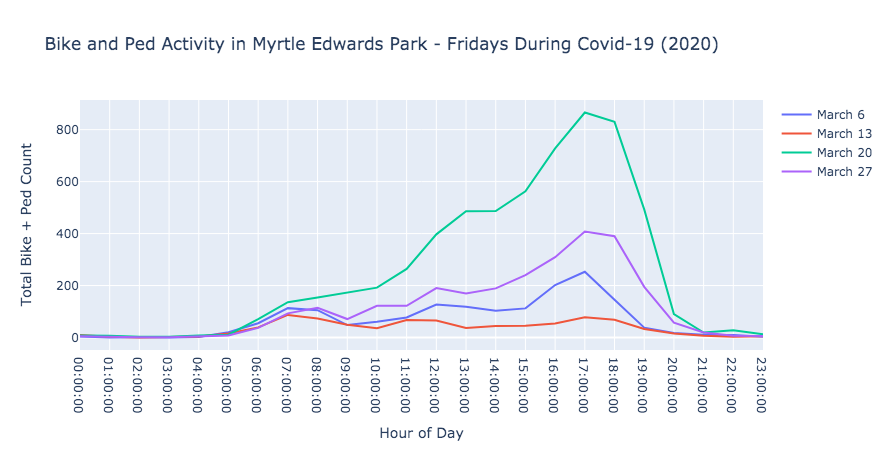

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=alltimes, y=hourlycounts('3/6/2020'),
                    mode='lines',
                    name='March 6'))
fig.add_trace(go.Scatter(x=alltimes, y=hourlycounts('3/13/2020'),
                    mode='lines',
                    name='March 13'))
fig.add_trace(go.Scatter(x=alltimes, y=hourlycounts('3/20/2020'),
                    mode='lines',
                    name='March 20'))
fig.add_trace(go.Scatter(x=alltimes, y=hourlycounts('3/27/2020'),
                    mode='lines',
                    name='March 27'))

fig.update_layout(title='Bike and Ped Activity in Myrtle Edwards Park - Fridays During Covid-19 (2020)',
                   xaxis_title='Hour of Day',
                   yaxis_title='Total Bike + Ped Count')
fig.show()

Well, I was wrong. Bicyle and pedestrian counts seem to vary quite a bit by day, and don't seem to be increasing over time. I'll look at the trend over time more shortly. Now I want to know how March 2020 overall compares to other years to see if, overall, March 2020 might see higher usage than prior years. I'll choose Fridays in March as a way to compare apples to apples across different years.
To start with, the function below would give you, for example, the average count at noon for all the Fridays in March 2020. 

In [19]:
def hourly_average_by_day(month, year, weekday, hour):
    monthly_total = []
    matching_records = list(record for record in records if record['Day of Week']==weekday and record['Month']==month and record['Time']==hour and record['Year']==year)
    for record in matching_records:
        monthly_total.append(record['Total'])
    return sum(monthly_total)/len(monthly_total)

Now I want to see how the Fridays in March 2020 compared to the Fridays in prior March months, so I can see a change over time. The following function applies hourly_average_by_day to every year from 2014-2020.

In [20]:
def counts_across_years(month, weekday, hour):
    counts_list=[]
    for year in range (2014,2021):
        count = hourly_average_by_day(month, year, weekday, hour)
        counts_list.append(count)
    return counts_list

counts_across_years(3, 'Friday', datetime.time(12, 0))

[268.25, 0.0, 259.75, 262.8, 256.2, 274.4, 194.75]

It appears that some data was missing in 2015. Aside from that, 
this data suggests that park usage is lower in 2020 compared to prior years, at least for Fridays at noon. But what about other days and times? How can I see them all at a glance?

The function below takes a month, year, and weekday (for example, Fridays in March 2020) and returns average counts for each hour: average counts at 10am, average counts at 11am, etc.

In [21]:
def monthly_average_by_hour(month, year, weekday):
    hourly_average=[]
    hourlist = sorted(unique(records, 'Time'))
    for hour in hourlist:
        hourly_average.append(hourly_average_by_day(month, year, weekday, hour))
    return hourly_average
monthly_average_by_hour(3, 2020, 'Friday')
#it would be best if this were a dictionary so we could ensure keys and values are matched up.

[6.75,
 3.0,
 1.25,
 1.25,
 4.5,
 13.5,
 50.5,
 107.25,
 111.5,
 85.0,
 102.75,
 132.5,
 194.75,
 202.5,
 205.75,
 240.0,
 323.25,
 401.25,
 358.25,
 189.75,
 44.75,
 14.0,
 12.0,
 6.5]

That data looks about right, based on what we saw from individual Fridays in March 2020 on the first graph. Usage peaks in late afternoon when people get off work. In the future I will output this as a dictionary so we can see the times associated with each count. For now I'm going to apply this function to different weekdays in March to compare trends. Let's choose Wednesday, because in transportation terms you get a better picture of people's habits if you choose data in the middle of the week. 

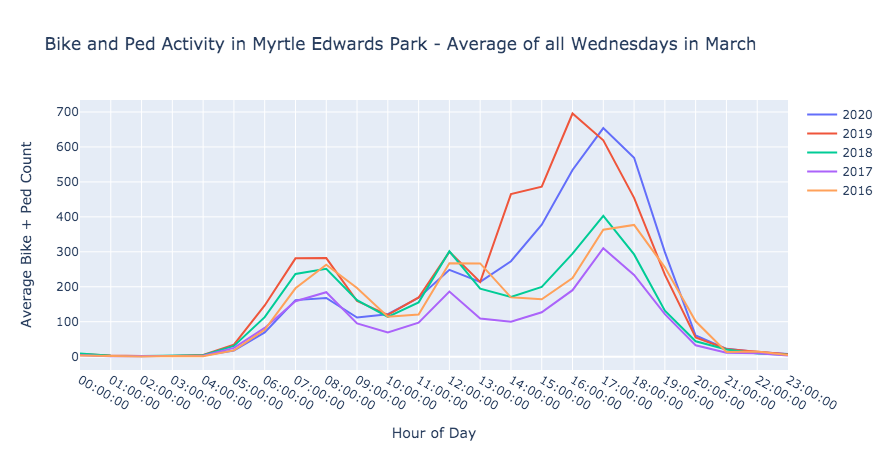

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=alltimes, y=monthly_average_by_hour(3, 2020, 'Wednesday'),
                    mode='lines',
                    name='2020'))
fig.add_trace(go.Scatter(x=alltimes, y=monthly_average_by_hour(3, 2019, 'Wednesday'),
                    mode='lines',
                    name='2019'))
fig.add_trace(go.Scatter(x=alltimes, y=monthly_average_by_hour(3, 2018, 'Wednesday'),
                    mode='lines',
                    name='2018'))
fig.add_trace(go.Scatter(x=alltimes, y=monthly_average_by_hour(3, 2017, 'Wednesday'),
                    mode='lines',
                    name='2017'))
fig.add_trace(go.Scatter(x=alltimes, y=monthly_average_by_hour(3, 2016, 'Wednesday'),
                    mode='lines',
                    name='2016'))
fig.update_layout(title='Bike and Ped Activity in Myrtle Edwards Park - Average of all Wednesdays in March',
                   xaxis_title='Hour of Day',
                   yaxis_title='Average Bike + Ped Count')
fig.show()

So activity in 2020 was higher than 2016-2018, but pretty on par with 2019. Why the spike in 2019? It may have had to do with the fact that March 19 and 20, 2019 (a Tuesday and Wednesday) broke the record for the warmest March temperature recorded in Seattle since 1894, topping out at 79 degrees. While March 2020 did not get that warm, it was exceptionally sunny, so that in addition to antsy people under lockdown may have pushed it to levels close to the prior year. 

Since those record-setting days may have been an outlier for 2019 though, it would be helpful to see this trend over the course of the month.  That is coming up next.

In [23]:
#x axis: weeks or days
#y axis: total count of the week
alldays = sorted(unique(records, 'Date'))